In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# CONSTANTS
T0 = 0      # Initial time t0 = 0
Y0 = 1      # Initial value y0 = 1 from the initial condition y(0) = 1
H = 0.1       # Step size h = 0.1 for this first example
T_END = 5   # End time t_end = 5 for the range of approximation


In [20]:
def f(t, y):
    """
    Function representing the right-hand side of the differential equation dy/dt = -2y + 2 - e^(-4t)
    
    Parameters:
    t (float): The current time value.
    y (float): The current value of the function y(t).
    
    Returns:
    float: The rate of change of y at time t.
    """
    return -2 * y + 2 - np.exp(-4 * t)


In [21]:
def exact_solution(t):
    """
    Exact solution to the differential equation derived.
    
    Parameters:
    t (float or array-like): The time points at which to evaluate the exact solution.
    
    Returns:
    float or array-like: The exact value of y(t) at the given time points.
    """
    return 1 + 0.5 * (np.exp(-4 * t) - np.exp(-2 * t))

In [22]:
def euler_method(f, t0, y0, h, t_end):
    """
    Implements Euler's method to approximate the solution of an ODE.
    
    Parameters:
    f (function): The function representing dy/dt.
    t0 (float): Initial time value.
    y0 (float): Initial value of y at t0.
    h (float): Step size for Euler's method.
    t_end (float): The final time value for the approximation.
    
    Returns:
    tuple: Arrays of time points and corresponding approximate y values.
    """
    # Generate an array of time points from t0 to t_end with step size h
    t_values = np.arange(t0, t_end + h, h)
    # Initialize an array to store the approximate y values
    y_values = np.zeros(len(t_values))
    # Set the initial condition for y
    y_values[0] = y0
    
    # Apply Euler's method iteratively
    for i in range(1, len(t_values)):
        # Update y based on Euler's formula
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])
    
    # Return both the time points and corresponding y values
    return t_values, y_values

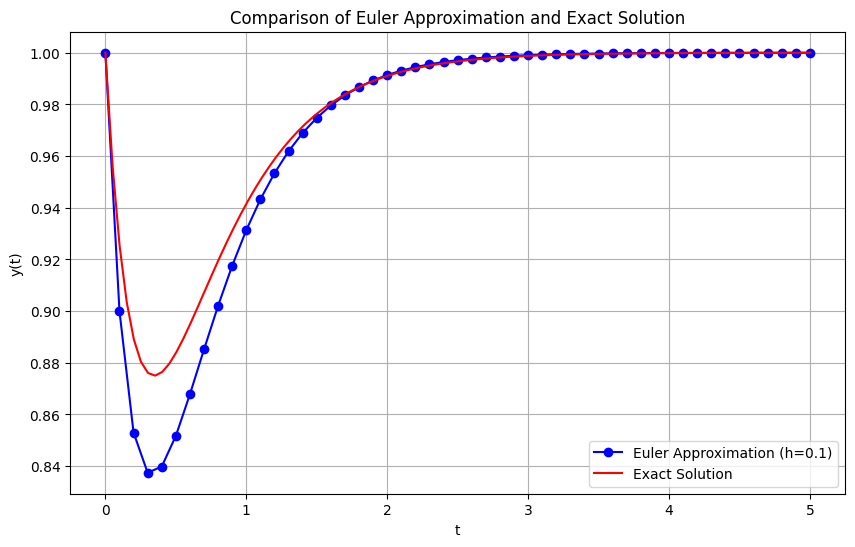

In [23]:
def main():
    # Compute Euler approximation using step size H = 1
    t_euler, y_euler = euler_method(f, T0, Y0, H, T_END)

    # Generate exact solution over a fine grid of time points for smooth plotting
    t_exact = np.linspace(T0, T_END, 100)
    y_exact = exact_solution(t_exact)

    # Plotting the Euler approximation and exact solution for comparison
    plt.figure(figsize=(10, 6))
    plt.plot(t_euler, y_euler, 'bo-', label='Euler Approximation (h=0.1)')  # Plot Euler's method approximation
    plt.plot(t_exact, y_exact, 'r', label='Exact Solution')  # Plot exact solution
    plt.title('Comparison of Euler Approximation and Exact Solution')  # Title of the plot
    plt.xlabel('t')  # Label for the x-axis (time)
    plt.ylabel('y(t)')  # Label for the y-axis (y value)
    plt.legend()  # Add a legend to differentiate the curves
    plt.grid(True)  # Add grid lines for better visualization
    plt.show()  # Display the plot

if __name__ == "__main__":
    main()
